In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

import numpy

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# plt.style.use('ggplot')

sns.set(style="white", color_codes=True)

## IMPORT FILES

In [14]:
tweetsDF = pd.read_csv("Tweets.csv")

with open("lexicons/positive-words.txt") as file:
    positiveList = set(file.read().splitlines())
    
with open("lexicons/negative-words.txt") as file:
    negativeList = set(file.read().splitlines())

In [15]:
tweetsDF.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,info1,info2,info3,info4,info5,info6
0,"5,70306133677761E+017",neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
1,"5,70301130888122E+017",positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
2,"5,70301083672814E+017",neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
3,"5,70301031407624E+017",negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
4,"5,70300817074463E+017",negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tweetsDF.drop(labels=['tweet_id',
                      'name',
                      'retweet_count',
                      'tweet_coord',
                      'tweet_created',
                      'tweet_location', 
                      'user_timezone',
                     'info1', "info2", 'info3', 'info4', 'info5', 'info6'], axis=1, inplace=True)

In [8]:
print("Porcentagem de dados nao nulos")
(len(tweetsDF)-tweetsDF.count())/len(tweetsDF)*100


Porcentagem de dados nao nulos


airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
negativereason_gold             99.781421
text                             0.000000
dtype: float64

Como as colunas 'airline_sentiment_gold' e 'negativereason_gold' estão praticamente inteiras com valores nulos, iremos deleta-las

In [9]:
tweetsDF.drop(labels=['airline_sentiment_gold',
                      'negativereason_gold'], axis=1,inplace=True)

In [10]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
text                            14640 non-null object
dtypes: float64(2), object(4)
memory usage: 686.3+ KB


---
Vamos preencher a coluna "negativereason_confidence" com dados da média

In [11]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

# transformed = imputer.fit_transform(tweetsDF["negativereason_confidence"])
negativeMean = tweetsDF["negativereason_confidence"].mean()
tweetsDF["negativereason_confidence"].fillna(negativeMean, inplace=True)
tweetsDF["negativereason"].fillna("Can't Tell", inplace=True)

/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  14640 non-null object
negativereason_confidence       14640 non-null float64
airline                         14640 non-null object
text                            14640 non-null object
dtypes: float64(2), object(4)
memory usage: 686.3+ KB


In [13]:
## Distribuição de sentimentos
sentimentCounter = tweetsDF['airline_sentiment'].value_counts()
sentimentCounter

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<Container object of 3 artists>

([<matplotlib.axis.XTick at 0x7f0074761d68>,
 <a list of 3 Text xticklabel objects>)

Text(0,0.5,'Mood Count')

Text(0.5,0,'Mood')

Text(0.5,1,'Count of Moods')

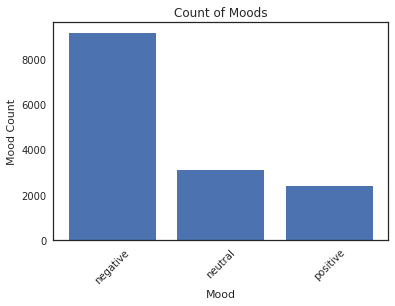

In [14]:
Index = [1,2,3]
plt.bar(Index,sentimentCounter)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

## Distribuição de tweets por companhia

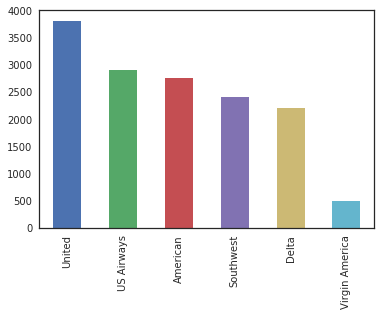

In [15]:
tweetsDF['airline'].value_counts().plot(kind='bar')

In [16]:
def plot_sub_sentiment(airline, tweet_df):
    df = tweet_df[tweet_df['airline']==airline]
    count = df['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count)
    plt.xticks(index,['negative','neutral','positive'])
    plt.ylabel('Frequencia')
    plt.xlabel('Sentimento')
    plt.title('Dist de sentimentos ' + airline)
#     plt.ylim(0, len(tweet_df))
    plt.ylim(0, 3000)

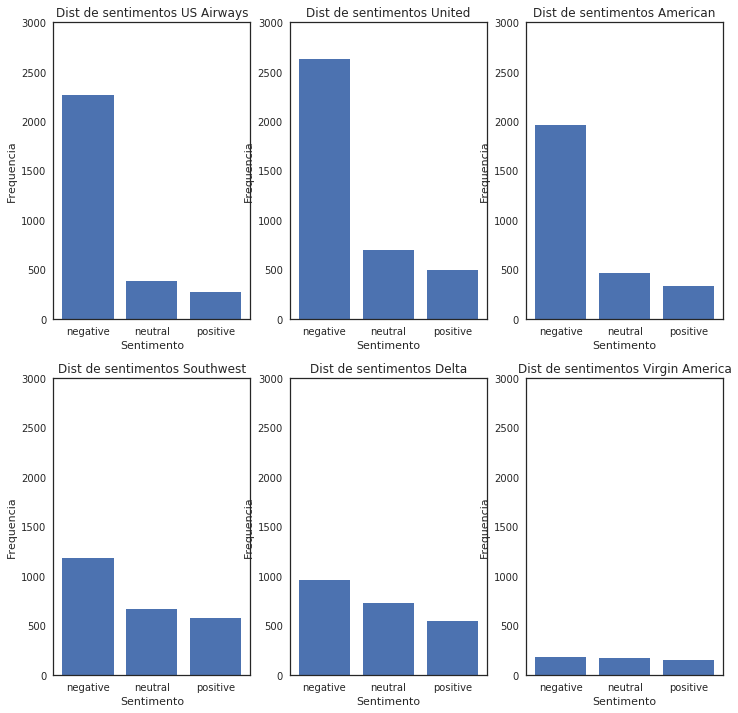

In [19]:
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways', tweetsDF)

plt.subplot(232)
plot_sub_sentiment('United', tweetsDF)

plt.subplot(233)
plot_sub_sentiment('American', tweetsDF)

plt.subplot(234)
plot_sub_sentiment('Southwest', tweetsDF)

plt.subplot(235)
plot_sub_sentiment('Delta', tweetsDF)

plt.subplot(236)
plot_sub_sentiment('Virgin America', tweetsDF)

---
## Motivos de reclamação
Vamos analisar a distribuição dos motivos de reclamacao

In [20]:
nrCounter = dict(tweetsDF['negativereason'].value_counts(sort=False))


In [76]:
def NR_Count(Airline, tweet_df):
    if Airline == 'All':
        df = tweet_df
    else:
        df = tweet_df[tweet_df['airline'] == Airline]
    
    count = dict(df['negativereason'].value_counts())
    Unique_reason = list(tweet_df['negativereason'].unique())
    Unique_reason = [x for x in Unique_reason if str(x) != 'nan']
    Reason_frame = pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count'] = Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline, tweet, ylim):
    df = NR_Count(Airline, tweet)
    count = df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count,)
#     plt.xticks(Index,df['Reasons'],rotation=45,)
    plt.xticks(Index,legends.values(),rotation=45,)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.ylim((0,ylim))
    plt.title('Count of Reasons for '+Airline)

In [80]:
Unique_reason = list(tweetsDF['negativereason'].unique())
Unique_reason = [x for x in Unique_reason if str(x) != 'nan']

legends = dict()
for line in Unique_reason:
    words = line.split()
    letters = [word[0].upper() for word in words]
    legends[line] = "".join(letters)
legends

{'Bad Flight': 'BF',
 "Can't Tell": 'CT',
 'Cancelled Flight': 'CF',
 'Customer Service Issue': 'CSI',
 'Damaged Luggage': 'DL',
 'Flight Attendant Complaints': 'FAC',
 'Flight Booking Problems': 'FBP',
 'Late Flight': 'LF',
 'Lost Luggage': 'LL',
 'longlines': 'L'}

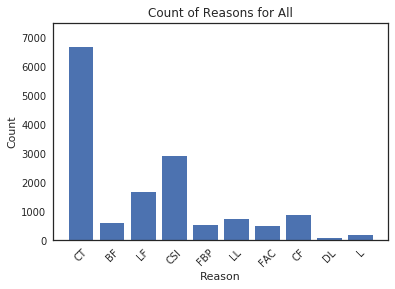

In [78]:
plot_reason('All', tweetsDF, ylim=7500)


Reclamacoes sobre o servico ao cliente sao as mais frequentes, seguidas de atraso de voo. É interessante notar que mais de 1000 reclamacoes estao em categorias diversas.

## Motivos de reclamacoes por companhia
Vamos analisar as reclamacoes por cada companhia

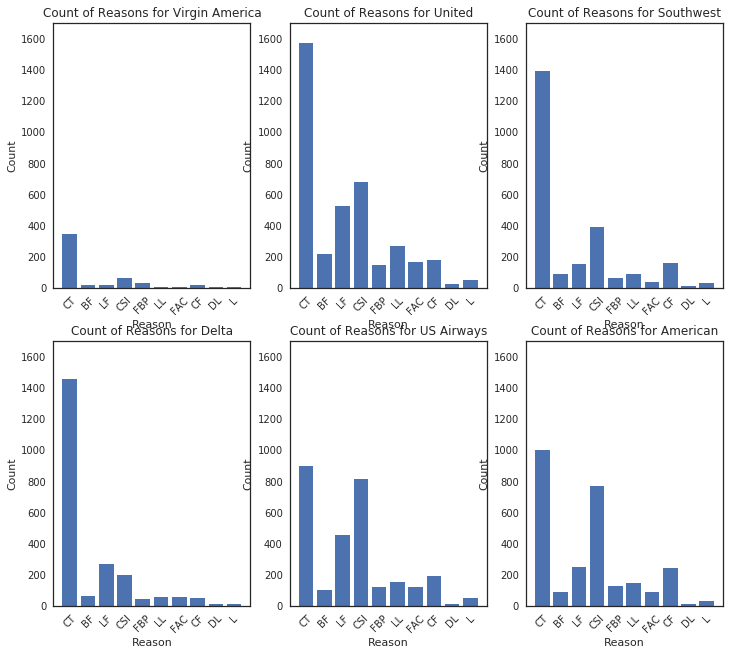

In [79]:
companies = list(tweetsDF["airline"].unique())
subPlot = 231
_ = plt.figure(1,figsize=(12, 12))

for c in companies:
    _ = plt.subplots_adjust(top=0.8)
    _ = plt.subplot(subPlot)
    plot_reason(c, tweetsDF, 1700)
    
    subPlot += 1

Em todas as companhias, a maior reclamacao é a do serviço ao cliente. Agora vamos plotar um wordcloud para ver quais as palavras mais frequentemente usadas. 

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
df = tweetsDF[tweetsDF["airline_sentiment"]=='negative']
words = ' '.join(df["text"])
cleanedWord = " ".join([w for w in words.split()
                            if "http" not in w
                            and not w.startswith("@")
                            and w != "RT"
                       ])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleanedWord)

(-0.5, 2999.5, 2499.5, -0.5)

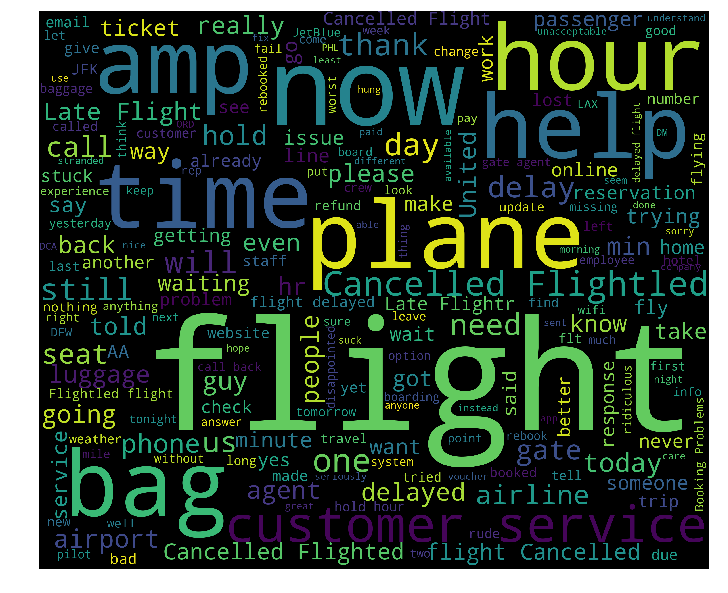

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Como as reclamacoes mais frequentes estao relacionadas ao servico ao consumidor e as palavras mais frequentes são "plane", "bag", "flight", podemos propor que a qualidade das aeronaves nao satisfaz os consumidores. Podem haver problemas com as bagagens de mao (espaço insuficiente, ou incovenientes). Além disso, a oferta de voos tambem pode ser um motivo de reclamacao

## Extração de características
Características basedas [neste](https://www.microsoft.com/en-us/research/wp-content/uploads/2015/03/main.pdf) trabalho serão utilizadas. Vale ressaltar que o autor extraiu 34 características. Nem todas elas serão extraídas aqui.

In [23]:
# feature 3
def countPositiveCapitalized(tokens):
    """
    Calculates the number of positive words that are capitalized
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True and t in positiveList:
            counter += 1
    return counter

# feature 4
def countNegativeCapitalized(tokens):
    """
    Calculates the number of negative words that are capitalized
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True and t in negativeList:
            counter += 1
    return counter

# feature 5
def hasCapitalized(tokens):
    """
    Check if the tweet has capitalized words
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t[0].isupper() == True:
            return 1
    return 0

# feature 6
def countHashtags(tokens):
    """
    Count the number of words that starts with # (hashtags)
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    for t in tokens:
        if t.startswith("#"):
            counter += 1
    return counter

# feature 7
def countPositive(tokens):
    """
    Calculates the number of words that are in the positive words list
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() in positiveList:
            counter += 1
    return counter

# feature 8
def countNegative(tokens):
    """
    Calculates the number of words that are in the negative words list
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() in negativeList:
            counter += 1
    return counter

# feature 9
def countNeutral(tokens):
    """
    Calculates the number of words that are in the neutral words list
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.lower() not in negativeList and t.lower() not in positiveList:
            counter += 1
    return counter

# feature 10
def countCapitalizedWords(tokens):
    """
    Calculates the number of words that are capitalized
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t.isupper() and len(t) > 1:
            counter += 1
    return counter

# feature 11
def countSpecialCharacters(tokens):
    """
    Calculates the number of occurrencies of all special character
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if not re.match("^[a-zA-Z0-9_]*$", t):
            counter += 1
    return counter

def countSpecificSpecialCharacter(specialCharacter, tokens):
    """
    Calculates the number of occurrencies of a specific special character
    
    @params:
        tokens: The non stopwords list
    """
    counter = 0
    tokensSplit = tokens.split()
    for t in tokensSplit:
        if t == specialCharacter:
            counter += 1
    return counter

In [34]:
def fixSpelling(tokens):
    import hunspell
    spellchecker = hunspell.HunSpell('/usr/share/hunspell/en_US.dic',
                                 '/usr/share/hunspell/en_US.aff')
                           
    words = tokens.split()              
    newWords = ""#list()
    for w in words:
        if not spellchecker.spell(w):
#             newWords.append(spellchecker.suggest(w)[0])
            try:
                newWords += " " + spellchecker.suggest(w)[0]
            except(IndexError):
                newWords += " " + ""
        else:
#             newWords.append(w)
            newWords += " " + w
    return newWords
        
def stemming(tokens):
    '''
    Apply stemming to each token
    '''
    
    stemmer = SnowballStemmer("english")  
    stemmed = [stemmer.stem(w) for w in tokens.split()]
    return stemmed
   

## Preprocessamento

Agora iremos preparar os tweets para servirem de input aos classificadores

In [68]:
import re
import nltk
from nltk.corpus import stopwords

In [69]:
tweetsDF.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,sentiment,tweet2words,num_capitalized,tweet_length,num_negative_words,num_positive_words,num_neutral_words,has_capitalized,num_capitalised_positive_words,num_capitalised_negative_words,num_hashtags,num_special_character
0,neutral,1.0000,Can't Tell,13.160358,Virgin America,@VirginAmerica What @dhepburn said.,1,What said,0,3,0,0,4,1,0,0,0,3
1,positive,0.3486,Can't Tell,0.000000,Virgin America,@VirginAmerica plus you've added commercials t...,1,plus added commercials experience tacky,0,6,0,0,9,0,0,0,0,4
2,neutral,0.6837,Can't Tell,13.160358,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1,I today Must mean I need take another trip,0,8,0,0,12,1,0,0,0,4
3,negative,1.0000,Bad Flight,0.703300,Virgin America,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0,11,2,0,15,0,0,0,0,5
4,negative,1.0000,Can't Tell,1.000000,Virgin America,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0,5,1,0,9,0,0,0,0,2


In [70]:
def tweet2words(raw_tweet):
    """
    Split the tweet string into words list and remove stopwords
        
    @params:
        raw_tweet: the tweet string collectd
    """
    callout_regex = "@[A-Za-z0-9_]+"
    #Remove mencoes a perfis
    letters_only = re.sub(callout_regex, " ", raw_tweet)
    letters_only = re.sub("[^a-zA-Z]", " ", letters_only)
    
    words = letters_only.lower().split()                             
    words = letters_only.split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 


def clean_tweet_length(raw_tweet):
    """
    Calculates the number of non stopwords
    
    @params:
        raw_tweet: the tweet string collectd
    """
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [71]:
tweetsDF['sentiment'] = tweetsDF['airline_sentiment'].apply(lambda x: 0 if x=="negative" else 1)

tweetsDF['tweet2words'] = tweetsDF['text'].apply(tweet2words)

tweetsDF["num_capitalized"] = tweetsDF["tweet2words"].apply(countCapitalizedWords)

tweetsDF['tweet_length'] = tweetsDF['text'].apply(clean_tweet_length)

tweetsDF["num_negative_words"] = tweetsDF["tweet2words"].apply(countNegative)

In [72]:
# Number of occurrencies
tweetsDF["num_positive_words"] = tweetsDF['text'].apply(countPositive)
tweetsDF["num_negative_words"] = tweetsDF['text'].apply(countNegative)
tweetsDF["num_neutral_words"] = tweetsDF['text'].apply(countNeutral)

# Capitalized words
tweetsDF["has_capitalized"] = tweetsDF['text'].apply(hasCapitalized)
tweetsDF["num_capitalised_positive_words"] = tweetsDF['text'].apply(countPositiveCapitalized)
tweetsDF["num_capitalised_negative_words"] = tweetsDF['text'].apply(countNegativeCapitalized)


tweetsDF["num_hashtags"] = tweetsDF['text'].apply(countHashtags)
tweetsDF["num_special_character"] = tweetsDF['text'].apply(countSpecialCharacters)

In [75]:
tweetsDF['correctedText'] =  tweetsDF['tweet2words'].apply(fixSpelling)


In [76]:
tweetsDF.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,sentiment,tweet2words,num_capitalized,tweet_length,num_negative_words,num_positive_words,num_neutral_words,has_capitalized,num_capitalised_positive_words,num_capitalised_negative_words,num_hashtags,num_special_character,correctedText
0,neutral,1.0000,Can't Tell,13.160358,Virgin America,@VirginAmerica What @dhepburn said.,1,What said,0,3,0,0,4,1,0,0,0,3,What said
1,positive,0.3486,Can't Tell,0.000000,Virgin America,@VirginAmerica plus you've added commercials t...,1,plus added commercials experience tacky,0,6,0,0,9,0,0,0,0,4,plus added commercials experience tacky
2,neutral,0.6837,Can't Tell,13.160358,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1,I today Must mean I need take another trip,0,8,0,0,12,1,0,0,0,4,I today Must mean I need take another trip
3,negative,1.0000,Bad Flight,0.703300,Virgin America,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...,0,11,2,0,15,0,0,0,0,5,really aggressive blast obnoxious entertainme...
4,negative,1.0000,Can't Tell,1.000000,Virgin America,@VirginAmerica and it's a really big bad thing...,0,really big bad thing,0,5,1,0,9,0,0,0,0,2,really big bad thing


In [77]:
tweetsDF.to_csv('preprocessed2.csv')

## Collected tweets

Let's have a look at the data we collected

In [17]:
from os import listdir
from os.path import isfile, join

tweetsPath = '03_processed/'
onlyfiles = [f for f in listdir(tweetsPath) if isfile(join(tweetsPath, f))]

In [18]:
dfList = list()
for file in onlyfiles:
    tweetsDF = pd.read_csv(tweetsPath + file)
    
    dfList.append(tweetsDF)